In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
books_df = pd.read_csv('data/books_clean.csv')

In [3]:
books_df.head()

,Unnamed: 0,text_reviews_count,average_rating,num_pages,publication_year,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,5333265,1,4.00,256,1984,3,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,1333909,6,3.23,256,2001,10,0.022321,0.977679,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2,7327624,7,4.03,600,1987,140,0.000000,0.195122,0.756098,0.024390,0.02439,0.000000,0.0,0.0,0.0,0.0
3,6066819,3282,3.49,368,2009,51184,0.000000,0.943878,0.000000,0.017007,0.00000,0.039116,0.0,0.0,0.0,0.0
4,287140,5,3.40,256,2011,15,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0


In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941978 entries, 0 to 1941977
Data columns (total 16 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Unnamed: 0                              int64  
 1   text_reviews_count                      int64  
 2   average_rating                          float64
 3   num_pages                               int64  
 4   publication_year                        int64  
 5   ratings_count                           int64  
 6   history, historical fiction, biography  float64
 7   fiction                                 float64
 8   fantasy, paranormal                     float64
 9   mystery, thriller, crime                float64
 10  poetry                                  float64
 11  romance                                 float64
 12  non-fiction                             float64
 13  children                                float64
 14  young-adult                       

In [5]:
books_df = books_df.rename(columns={'Unnamed: 0': 'book_id'}).set_index('book_id')

In [6]:
scaler = StandardScaler()
normalizer = Normalizer()
normalized_df = normalizer.fit_transform(books_df)
scaled_df = scaler.fit_transform(books_df)

## PCA

In [7]:
pca = PCA(random_state=101).fit(scaled_df)

In [8]:
pca.explained_variance_ratio_

array([1.20591437e-01, 1.01578557e-01, 8.81535211e-02, 7.83789372e-02,
       7.43547637e-02, 7.19241068e-02, 7.06094186e-02, 6.90333635e-02,
       6.65982854e-02, 6.46133197e-02, 6.26657877e-02, 6.05997255e-02,
       5.77973852e-02, 1.31013915e-02, 1.92597574e-22])

In [9]:
pc_df = pd.DataFrame(pca.components_)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.702038,0.019318,0.011457,0.001023,0.700797,-0.047539,0.046755,0.046364,0.008439,-0.014129,0.015470,-0.068503,-0.004148,0.059533,-0.012677
1,0.078227,0.061966,0.006325,-0.012055,0.087011,0.442797,-0.383809,-0.313213,-0.173139,0.048860,-0.183804,0.641578,-0.037062,-0.248260,0.005096
2,0.010972,-0.352526,0.056085,-0.029396,0.013085,0.194994,0.570641,-0.409027,0.341048,-0.100713,-0.349860,-0.062985,-0.120828,-0.241344,-0.121633
3,0.005729,-0.077100,0.201110,0.039624,-0.001429,0.166756,-0.077487,-0.096891,0.065424,-0.168000,0.696269,-0.078057,-0.568476,-0.189650,-0.162131
4,-0.019022,-0.032074,0.273262,-0.014925,-0.028103,0.330208,0.257650,0.348418,-0.478423,-0.283806,-0.190691,0.070204,-0.120122,0.345515,-0.376261


<Axes: >

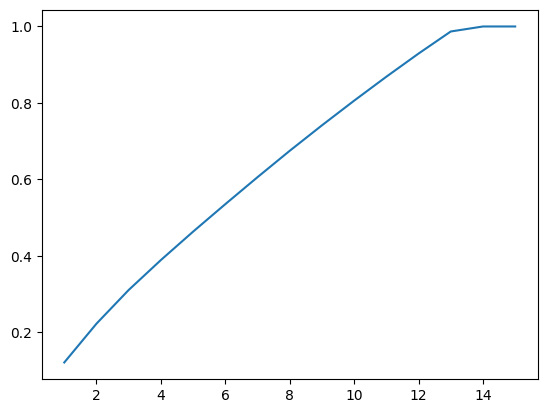

In [10]:
sns.lineplot(x=[x for x in range(1, 16)], y=np.cumsum(pca.explained_variance_ratio_))

In [11]:
pc_df.to_csv('data/books_pca_embeddings.csv', index=False)

## SVD

In [12]:
svd = TruncatedSVD(random_state=101)
svd.fit(scaled_df)
svd_df = pd.DataFrame(svd.components_)
svd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.702045,0.018019,0.016699,0.000930,0.700821,-0.046519,0.045548,0.046081,0.008320,-0.017071,0.016894,-0.069190,-0.001158,0.058474,-0.012713
1,0.078066,0.063533,0.000092,-0.011963,0.086837,0.441635,-0.382567,-0.312939,-0.173037,0.052622,-0.185748,0.642574,-0.040379,-0.247149,0.005258


In [13]:
svd_df = svd_df.T
svd_df['feature'] = books_df.columns
svd_df

,0,1,feature
0,0.702045,0.078066,text_reviews_count
1,0.018019,0.063533,average_rating
2,0.016699,0.000092,num_pages
3,0.000930,-0.011963,publication_year
4,0.700821,0.086837,ratings_count
5,-0.046519,0.441635,"history, historical fiction, biography"
6,0.045548,-0.382567,fiction
7,0.046081,-0.312939,"fantasy, paranormal"
8,0.008320,-0.173037,"mystery, thriller, crime"
9,-0.017071,0.052622,poetry


## Interactions

In [14]:
int_df = pd.read_csv('data/goodreads_interactions.csv', chunksize=1000)

In [15]:
for chunk in int_df:
    int_chunk = chunk
    break

In [16]:
int_chunk.head()

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0


In [17]:
int_chunk[int_chunk.is_read == 0]

,user_id,book_id,is_read,rating,is_reviewed
35,0,913,0,0,1
37,0,911,0,0,0
38,0,910,0,0,1
41,0,907,0,0,0
42,0,906,0,0,0
...,...,...,...,...,...
963,1,1052,0,0,0
965,1,1049,0,0,0
967,1,1047,0,0,0
968,1,1046,0,0,0


In [18]:
int_chunk.book_id.value_counts()

book_id
828     2
846     2
943     2
259     2
704     2
       ..
609     1
608     1
607     1
606     1
1020    1
Name: count, Length: 995, dtype: int64

In [19]:
int_chunk.pivot(index='user_id', columns='book_id', values='rating')

book_id,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0


In [20]:
int_df = pd.read_csv('data/goodreads_interactions.csv')

In [21]:
len(int_df.book_id.unique())

2360650

In [22]:
len(int_df.user_id.unique())

876145

In [23]:
read_counts = int_df.groupby(by='book_id').sum().sort_values('is_read', ascending=False)

In [24]:
read_counts.head()

,user_id,is_read,rating,is_reviewed
book_id,,,,
943,112531620874,285698,1266209,8520
536,107499851148,277345,1193246,18718
1000,86453443081,231952,772249,10627
786,89645427333,196407,823466,7373
941,63934724092,176261,785312,4724


In [25]:
read_counts.describe()

,user_id,is_read,rating,is_reviewed
count,2.360650e+06,2.360650e+06,2.360650e+06,2.360650e+06
mean,2.422071e+07,4.750014e+01,1.744746e+02,6.870628e+00
std,3.639627e+08,8.489461e+02,3.356465e+03,6.607648e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.247960e+05,2.000000e+00,5.000000e+00,1.000000e+00
50%,2.295431e+06,5.000000e+00,1.600000e+01,1.000000e+00
75%,8.188800e+06,1.400000e+01,4.900000e+01,3.000000e+00
max,1.125316e+11,2.856980e+05,1.266209e+06,2.085900e+04


In [26]:
len(read_counts[read_counts.is_read >= 10000])/len(read_counts)

0.0004219176921610573

In [52]:
len(read_counts[read_counts.is_read >= 9986])

1000

In [53]:
read_counts = read_counts[read_counts.is_read >= 9986]

In [54]:
read_counts.sort_values('is_read')

,user_id,is_read,rating,is_reviewed
book_id,,,,
42701,3118623421,9989,39618,335
18742,3784918426,9990,34201,844
16254,3010837025,9997,40883,202
8398,4339746987,9999,35792,1347
14795,5390037981,10011,39217,1669
...,...,...,...,...
941,63934724092,176261,785312,4724
786,89645427333,196407,823466,7373
1000,86453443081,231952,772249,10627


In [55]:
int_df = int_df[int_df.book_id.isin(read_counts.index)]

In [56]:
int_df['shelved'] = 1

In [57]:
int_df.head()

,user_id,book_id,is_read,rating,is_reviewed,shelved
1,0,947,1,5,1,1
4,0,944,1,5,0,1
5,0,943,1,5,0,1
7,0,941,1,5,0,1
8,0,940,1,5,0,1


In [58]:
int_df.to_csv('data/interactions_top_books.csv', index=False)

In [42]:
int2_df = pd.read_json(gzip.open('data/goodreads_interactions_dedup.json.gz'), lines=True, chunksize=1000)
for chunk in int2_df:
    int2_chunk = chunk
    break

In [59]:
ratings_df =pd.read_csv('data/ratings.csv')

In [60]:
ratings_df.head()

,user_id,19,43,49,51,66,80,100,126,134,...,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
len(ratings_df)

797605

In [63]:
train, test = train_test_split(ratings_df, test_size=0.2, random_state=101)

In [64]:
train.to_csv('data/ratings_train.csv')
test.to_csv('data/ratings_test.csv')

In [66]:
test.index

Index([189906, 461042,  72693, 621582, 736986,  59236, 712660, 282264, 127349,
       126622,
       ...
       468657, 304110,  31541, 308561,  39621, 569189, 266618, 671996,  47692,
       186200],
      dtype='int64', length=159521)

In [69]:
pca = PCA(n_components=0.80, random_state=101)
pca.fit(train)

PCA(n_components=0.8, random_state=101)

In [73]:
pca.explained_variance_ratio_

array([0.99999999])